In [2]:
# ignore warnings
import numpy as np # linear algebra
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt 
import seaborn as sns
import plotly.express as px
%matplotlib inline
plt.style.use('fivethirtyeight')

import optuna

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.utils.class_weight import compute_class_weight
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier, VotingClassifier, RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, cross_validate, cross_val_predict, RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SequentialFeatureSelector

In [3]:
train_df=pd.read_csv("playground-series-s4e6/train.csv")
test_df=pd.read_csv('playground-series-s4e6/test.csv')

In [4]:
train_df.head(25)

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate
5,5,1,39,1,171,1,19,133.1,1,19,...,0,0,0,0,0.000000,0,13.9,-0.3,0.79,Dropout
6,6,1,44,1,9085,1,39,130.0,1,37,...,0,5,8,5,13.250000,0,12.4,0.5,1.79,Graduate
7,7,1,1,1,9773,1,1,130.0,1,19,...,0,6,6,6,13.666667,0,10.8,1.4,1.74,Graduate
8,8,1,39,1,9003,1,1,133.1,1,19,...,0,6,10,0,0.000000,0,16.2,0.3,-0.92,Dropout
9,9,1,1,6,9500,1,1,135.0,1,37,...,0,7,7,6,12.966667,0,7.6,2.6,0.32,Graduate


In [5]:
test_df.head(15)

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,76518,1,1,1,9500,1,1,141.0,1,3,...,0,0,8,0,0,0.000000,0,13.9,-0.3,0.79
1,76519,1,1,1,9238,1,1,128.0,1,1,...,0,0,6,6,6,13.500000,0,11.1,0.6,2.02
2,76520,1,1,1,9238,1,1,118.0,1,1,...,0,0,6,11,5,11.000000,0,15.5,2.8,-4.06
3,76521,1,44,1,9147,1,39,130.0,1,1,...,0,3,8,14,5,11.000000,0,8.9,1.4,3.51
4,76522,1,39,1,9670,1,1,110.0,1,1,...,0,0,6,9,4,10.666667,2,7.6,2.6,0.32
5,76523,1,17,4,9238,1,1,137.0,1,1,...,0,0,6,7,6,14.428571,0,11.1,0.6,2.02
6,76524,1,1,1,9773,1,1,126.0,1,1,...,0,0,6,6,6,13.333333,0,12.7,3.7,-1.70
7,76525,1,44,1,9003,1,39,150.0,1,19,...,0,0,6,6,6,12.666667,0,13.9,-0.3,0.79
8,76526,1,1,2,9773,1,1,131.0,1,38,...,0,0,6,8,5,11.000000,0,8.9,1.4,3.51
9,76527,1,1,1,9254,1,1,111.0,1,19,...,0,0,6,6,6,13.166667,0,11.1,0.6,2.02


In [6]:
train_df.isna().sum().sort_values(ascending=False)

id                                                0
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship 

In [7]:
train_df.duplicated().sum()

0

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              76518 non-null  int64  
 1   Marital status                                  76518 non-null  int64  
 2   Application mode                                76518 non-null  int64  
 3   Application order                               76518 non-null  int64  
 4   Course                                          76518 non-null  int64  
 5   Daytime/evening attendance                      76518 non-null  int64  
 6   Previous qualification                          76518 non-null  int64  
 7   Previous qualification (grade)                  76518 non-null  float64
 8   Nacionality                                     76518 non-null  int64  
 9   Mother's qualification                 

In [9]:
train_df.describe()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,...,76518.00000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000
mean,38258.500000,1.111934,16.054419,1.644410,9001.286377,0.915314,3.658760,132.378766,1.226600,19.837633,...,0.05796,0.137053,5.933414,7.234468,4.007201,9.626085,0.062443,11.520340,1.228218,-0.080921
std,22088.988286,0.441669,16.682337,1.229645,1803.438531,0.278416,8.623774,10.995328,3.392183,15.399456,...,0.40849,0.933830,1.627182,3.503040,2.772956,5.546035,0.462107,2.653375,1.398816,2.251382
min,0.000000,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,19129.250000,1.000000,1.000000,1.000000,9119.000000,1.000000,1.000000,125.000000,1.000000,1.000000,...,0.00000,0.000000,5.000000,6.000000,1.000000,10.000000,0.000000,9.400000,0.300000,-1.700000
50%,38258.500000,1.000000,17.000000,1.000000,9254.000000,1.000000,1.000000,133.100000,1.000000,19.000000,...,0.00000,0.000000,6.000000,7.000000,5.000000,12.142857,0.000000,11.100000,1.400000,0.320000
75%,57387.750000,1.000000,39.000000,2.000000,9670.000000,1.000000,1.000000,140.000000,1.000000,37.000000,...,0.00000,0.000000,6.000000,9.000000,6.000000,13.244048,0.000000,12.700000,2.600000,1.790000
max,76517.000000,6.000000,53.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,...,12.00000,19.000000,23.000000,33.000000,20.000000,18.000000,12.000000,16.200000,3.700000,3.510000


In [10]:
init_features = list(train_df.columns)
init_features

['id',
 'Marital status',
 'Application mode',
 'Application order',
 'Course',
 'Daytime/evening attendance',
 'Previous qualification',
 'Previous qualification (grade)',
 'Nacionality',
 "Mother's qualification",
 "Father's qualification",
 "Mother's occupation",
 "Father's occupation",
 'Admission grade',
 'Displaced',
 'Educational special needs',
 'Debtor',
 'Tuition fees up to date',
 'Gender',
 'Scholarship holder',
 'Age at enrollment',
 'International',
 'Curricular units 1st sem (credited)',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (grade)',
 'Curricular units 1st sem (without evaluations)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (grade)',
 'Curricular units 2nd sem (without evaluations)',
 'Unemployment rate',
 'Inflat

In [11]:
for col in train_df.columns:
    print(f'{col} has {train_df[col].nunique()} unique values')

id has 76518 unique values
Marital status has 6 unique values
Application mode has 22 unique values
Application order has 8 unique values
Course has 19 unique values
Daytime/evening attendance has 2 unique values
Previous qualification has 21 unique values
Previous qualification (grade) has 110 unique values
Nacionality has 18 unique values
Mother's qualification has 35 unique values
Father's qualification has 39 unique values
Mother's occupation has 40 unique values
Father's occupation has 56 unique values
Admission grade has 668 unique values
Displaced has 2 unique values
Educational special needs has 2 unique values
Debtor has 2 unique values
Tuition fees up to date has 2 unique values
Gender has 2 unique values
Scholarship holder has 2 unique values
Age at enrollment has 46 unique values
International has 2 unique values
Curricular units 1st sem (credited) has 21 unique values
Curricular units 1st sem (enrolled) has 24 unique values
Curricular units 1st sem (evaluations) has 36 uni

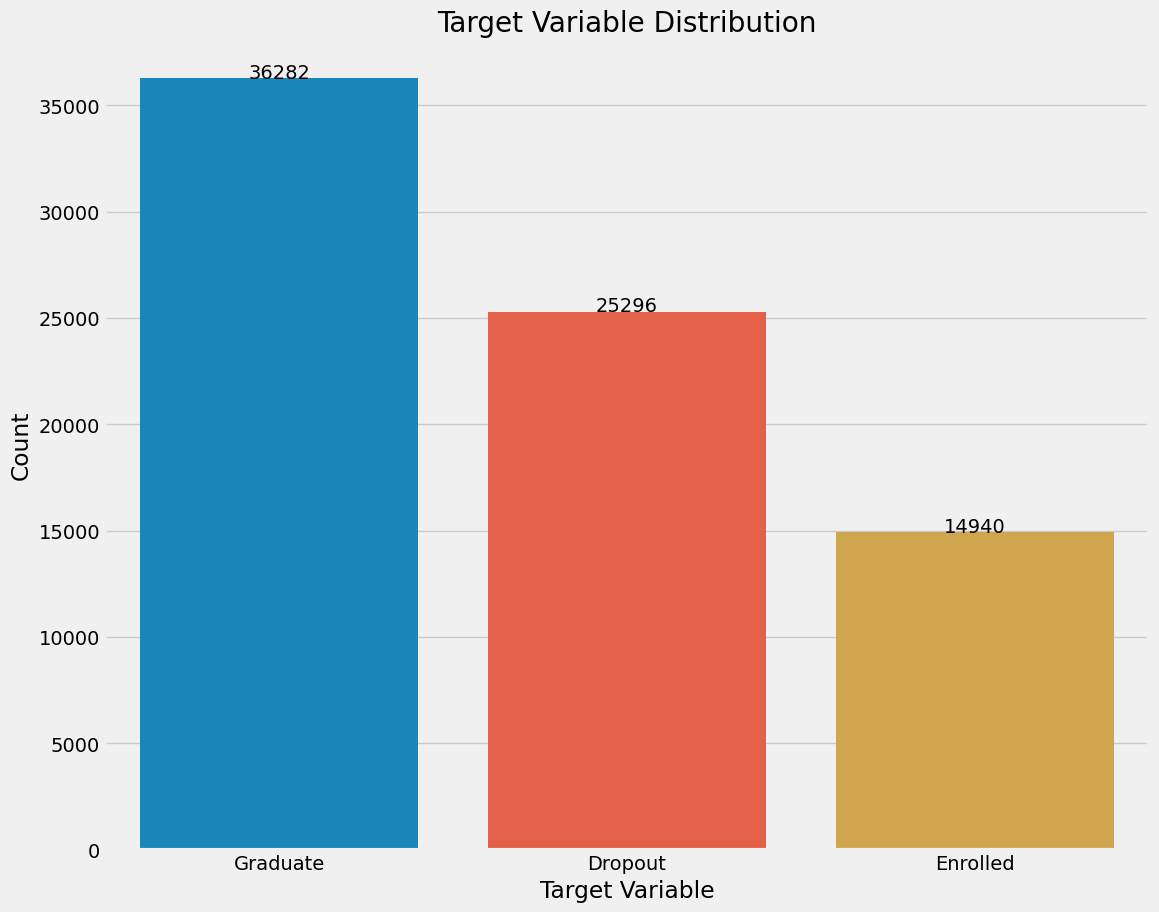

In [12]:
plt.figure(figsize=(12, 10))
ax = sns.countplot(x='Target', data=train_df)

# Add labels to each bar in the plot
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height() + 3, f'{int(p.get_height())}', ha="center")

plt.xlabel('Target Variable')
plt.ylabel('Count')
plt.title('Target Variable Distribution')
plt.show()

In [13]:
numerical_cols = ['Admission grade', 
               'Age at enrollment', 
               'Curricular units 1st sem (credited)',
               'Curricular units 1st sem (enrolled)',
               'Curricular units 1st sem (evaluations)',
               'Curricular units 1st sem (approved)',
               'Curricular units 1st sem (grade)',
               'Curricular units 1st sem (without evaluations)',
               'Curricular units 2nd sem (credited)',
               'Curricular units 2nd sem (enrolled)',
               'Curricular units 2nd sem (evaluations)',
               'Curricular units 2nd sem (approved)',
               'Curricular units 2nd sem (grade)',
               'Curricular units 2nd sem (without evaluations)',
               'Unemployment rate',
               'Inflation rate',
               'GDP']
len(numerical_cols)

17

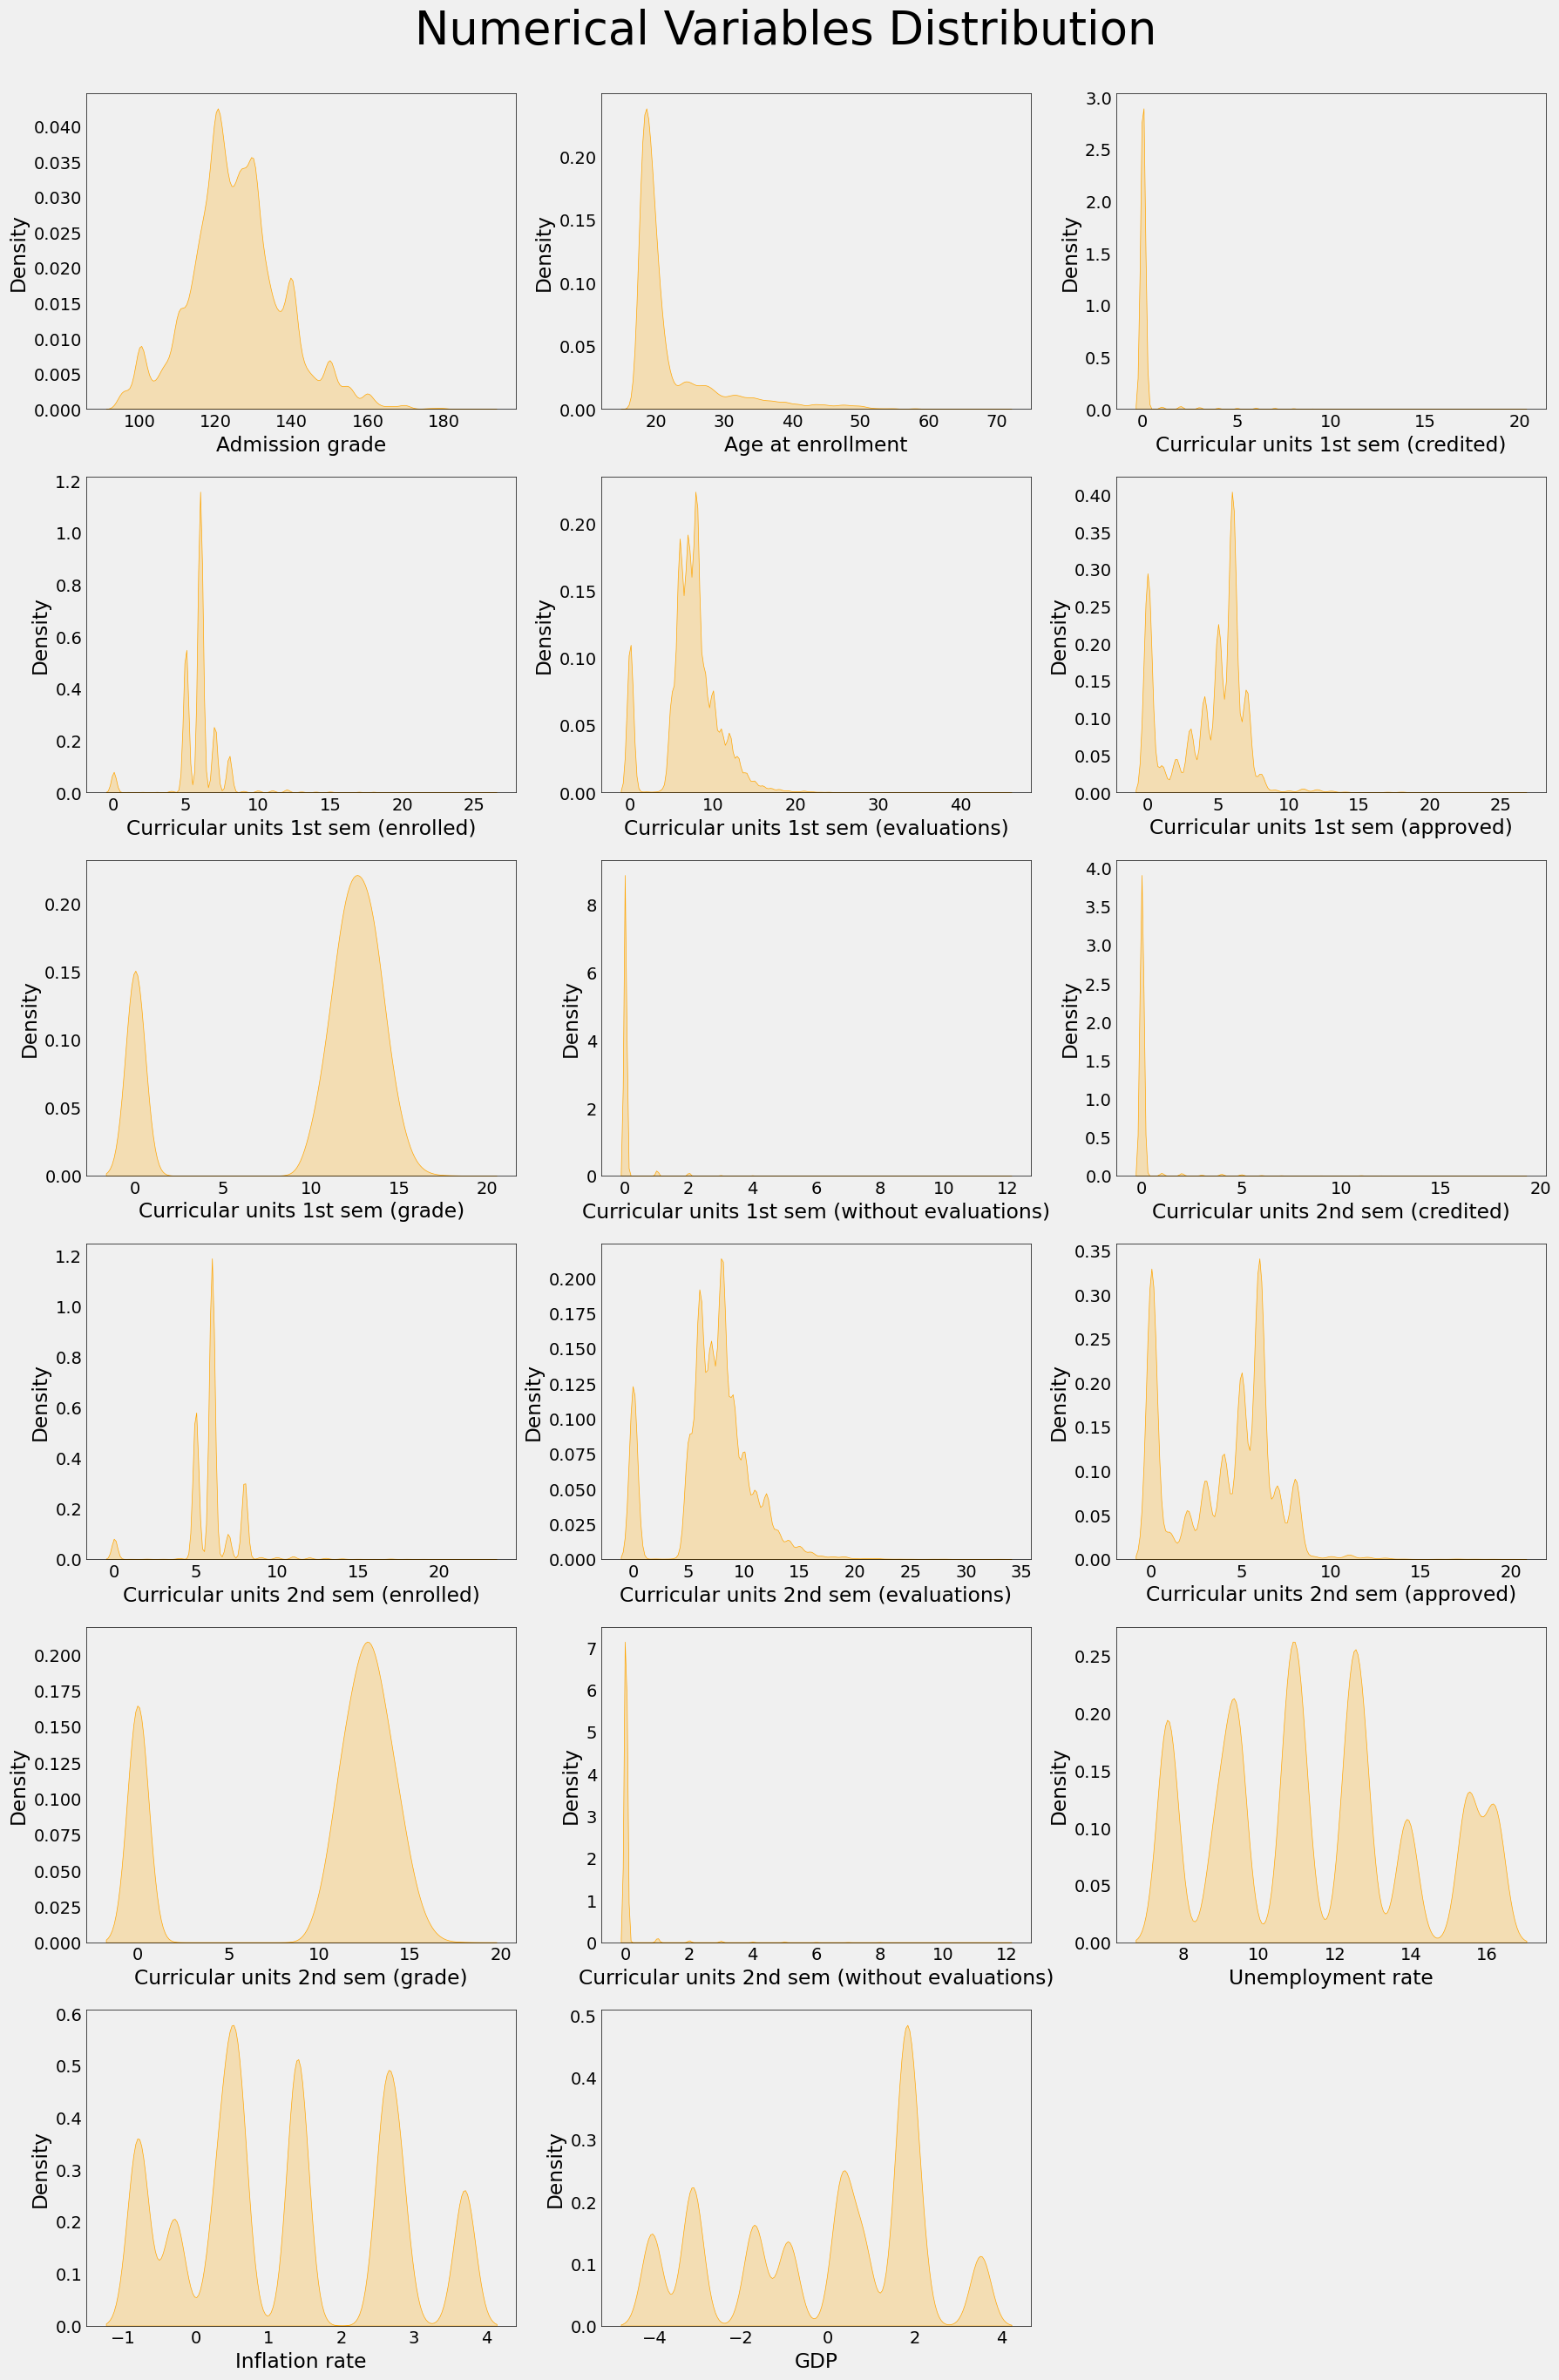

In [14]:
plt.figure(figsize=(18, 40))
plotnumber = 1

for column in numerical_cols:
    if plotnumber <= len(numerical_cols):
        ax = plt.subplot(9, 3, plotnumber)
        sns.kdeplot(train_df[column], color='orange', fill=True)
        for spine in ax.spines.values():
            spine.set_visible(True)
            spine.set_color('black')
            spine.set_linewidth(0.5)
        plt.xlabel(column)
        ax.grid(False)
        
    plotnumber += 1

plt.suptitle('Numerical Variables Distribution', fontsize=38, y=1)
plt.tight_layout()
plt.show()

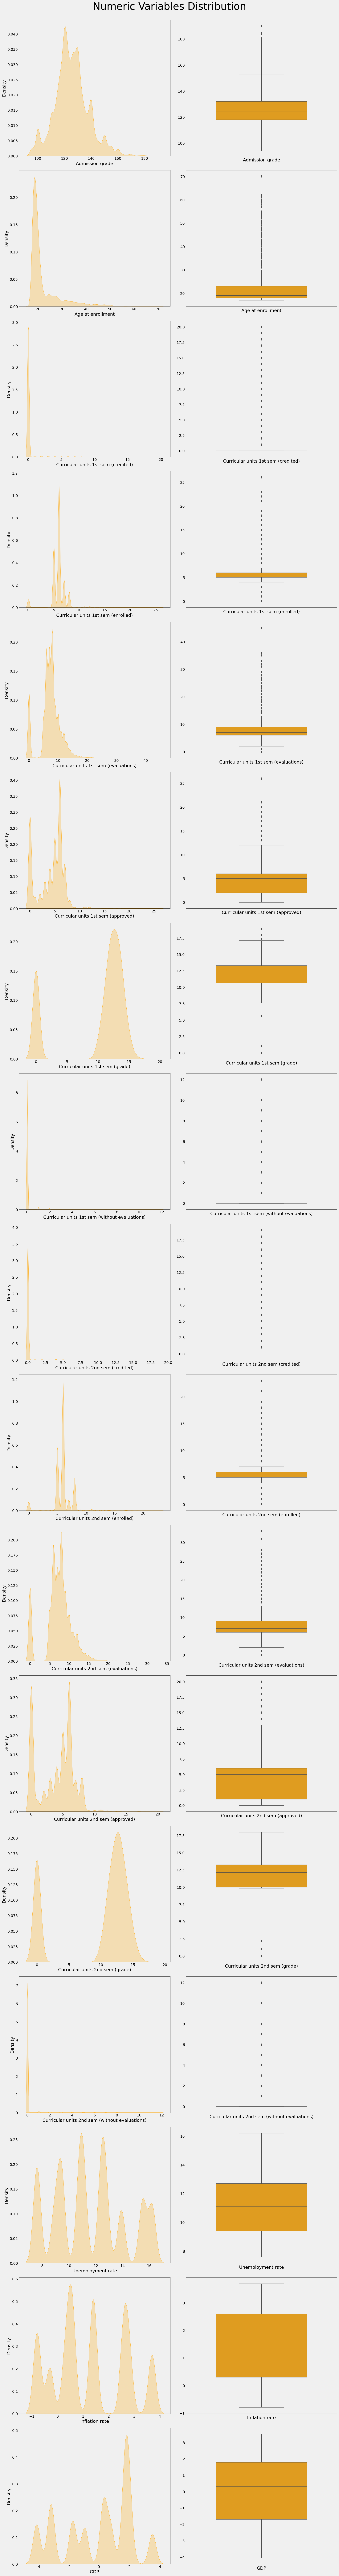

In [15]:
plt.figure(figsize=(18, 135))
plotnumber = 1

for col in numerical_cols:
    if plotnumber <= len(numerical_cols):
        
        ax1 = plt.subplot(len(numerical_cols), 2, 2 * plotnumber - 1)
        sns.kdeplot(train_df[col], color='orange', fill=True)
        for spine in ax1.spines.values():
            spine.set_visible(True)
            spine.set_color('black')
            spine.set_linewidth(0.5)
        ax1.set_xlabel(col)
        ax1.grid(False)
        
        ax2 = plt.subplot(len(numerical_cols), 2, 2 * plotnumber)
        sns.boxplot(y=train_df[col], color='orange', width=0.6, linewidth=1)
        for spine in ax2.spines.values():
            spine.set_visible(True)
            spine.set_color('black')
            spine.set_linewidth(0.5)
        ax2.set_xlabel(col)
        ax2.set_ylabel('')
        ax2.grid(False)

    plotnumber += 1

plt.suptitle('Numeric Variables Distribution', fontsize=38, y=1)
plt.tight_layout()
plt.show()

In [16]:
categorical_cols = ['Marital status', 
               'Application mode', 
               'Application order', 
               'Daytime/evening attendance',
               'Previous qualification', 
               'Nacionality', 
               "Mother's qualification",
               "Father's qualification", 
               "Mother's occupation", 
               "Father's occupation", 
               'Displaced',
               'Educational special needs', 
               'Debtor', 
               'Tuition fees up to date', 
               'Gender',
               'Scholarship holder', 
               'International']
len(categorical_cols)

17

In [17]:
# Map target variables to nums
train_df['Target'] = train_df['Target'].map({'Graduate': 0, 'Dropout': 1, 'Enrolled': 2})

In [18]:
train_df['Target']

0        0
1        1
2        1
3        2
4        0
        ..
76513    0
76514    0
76515    2
76516    1
76517    0
Name: Target, Length: 76518, dtype: int64

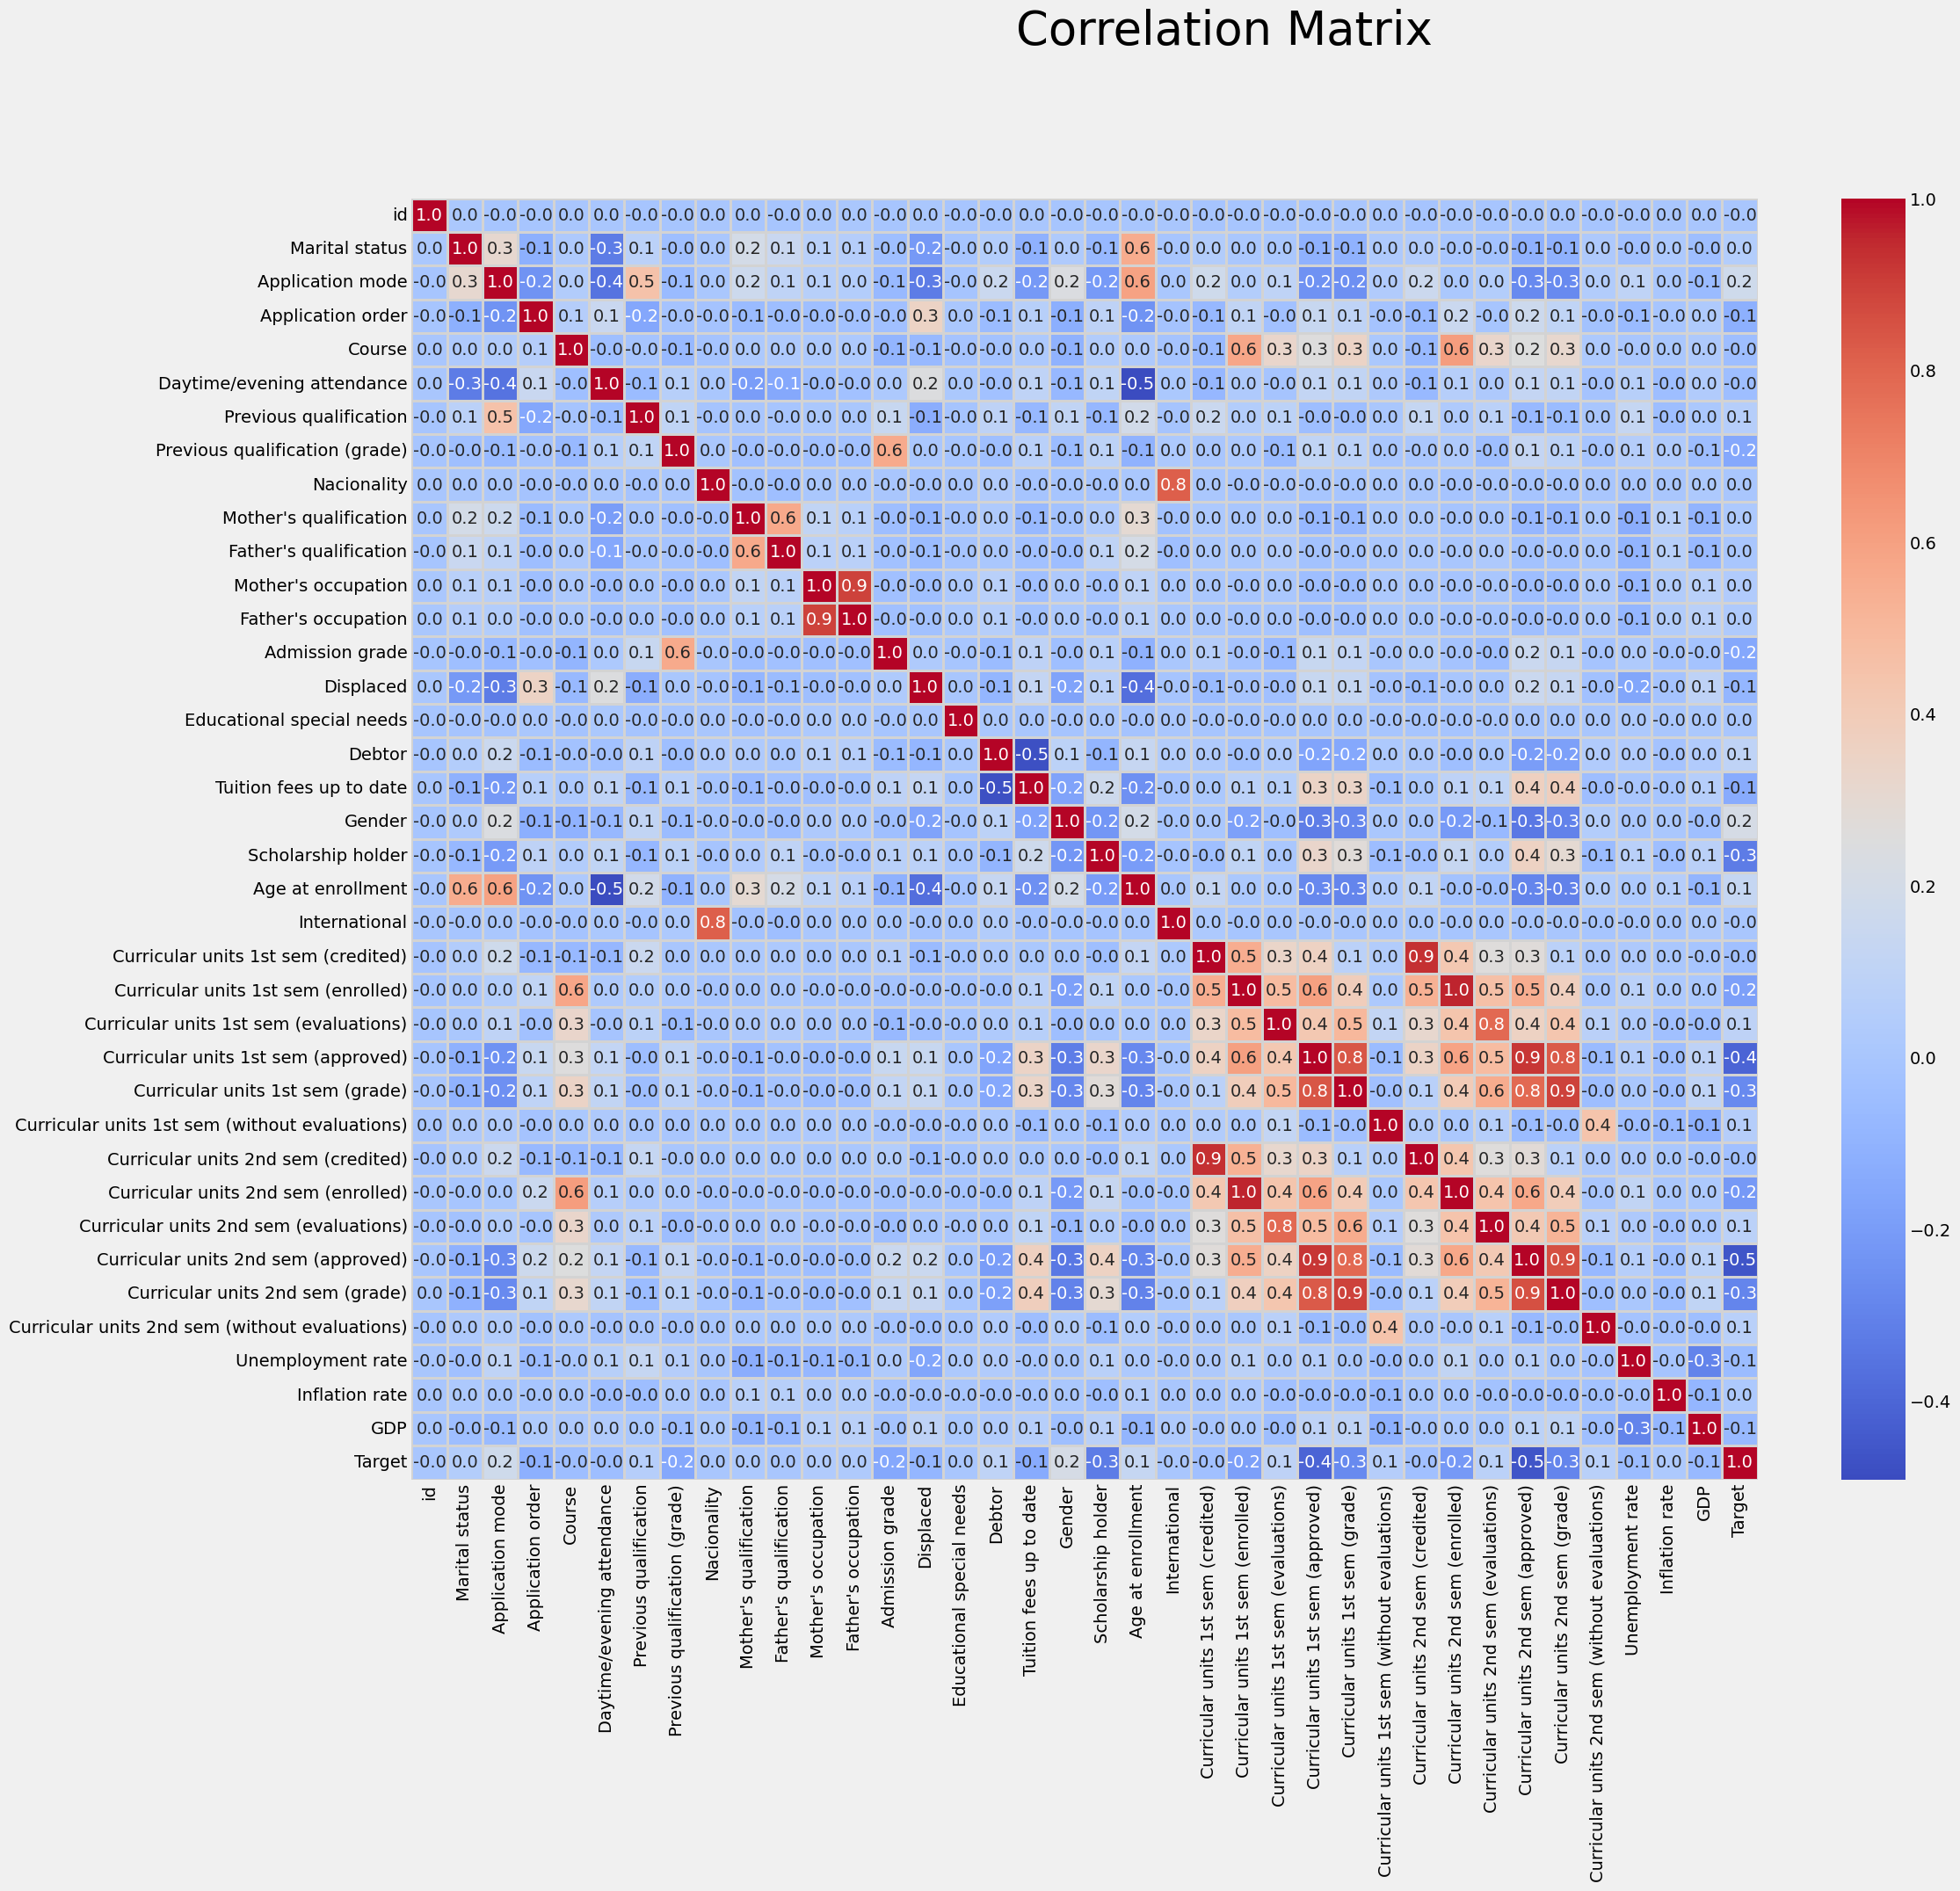

In [19]:
# Correlation matrix
plt.figure(figsize=(22, 18))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm', fmt='.1f', linewidths=2, linecolor='lightgrey')
plt.suptitle('Correlation Matrix', fontsize=38, y=1)
plt.show()

In [20]:
def handle_missing_numerical_value(df):
    numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())
    return df

def handle_categorical_variables(df):
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    categorical_cols = [col for col in categorical_cols if col != 'Target']
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
    return df
    

def apply_data_preprocessing(df, is_train=True, epsilon=1e-5):
    ids = df.pop('id')

    cols_to_drop = [
        'Nacionality',
        'International']
    
    df = df.drop(columns=cols_to_drop)
    
    df['curricular_units_product'] = df['Curricular units 1st sem (enrolled)'] * df['Curricular units 2nd sem (enrolled)']

    df['approved_enrolled_1st_sem_ratio'] = df['Curricular units 1st sem (approved)'] / (df['Curricular units 1st sem (enrolled)'] + epsilon)
    df['approved_enrolled_2nd_sem_ratio'] = df['Curricular units 2nd sem (approved)'] / (df['Curricular units 2nd sem (enrolled)'] + epsilon)
    
    df['grades_total'] = df['Curricular units 1st sem (grade)'] + df['Curricular units 2nd sem (grade)']
    
    
    df['inflation_gdp_ratio'] = (df['Inflation rate'] + epsilon) / (df['GDP'] + epsilon)
    df['unemployment_gdp_ratio'] = (df['Unemployment rate'] + epsilon) / (df['GDP'] + epsilon)
    df['gdp_inflation_interaction'] = df['GDP'] * df['Inflation rate']
    
    df['parents_qualification_interaction'] = (df['Mother\'s qualification'] * df['Father\'s qualification'])
    
    # interaction between age at enrollment and scholarship
    df['age_scholarship_interaction'] = (df['Age at enrollment'] * df['Scholarship holder'])

    
    # academic performance
    df['total_academic_performance'] = (df['Previous qualification (grade)'] + df['Admission grade'])
    
    # total number of failed units
    df['failed_curricular_units_1st_sem'] = df['Curricular units 1st sem (approved)'] - df['Curricular units 1st sem (credited)']
    df['failed_curricular_units_2nd_sem'] = df['Curricular units 2nd sem (approved)'] - df['Curricular units 2nd sem (credited)']
        
    df = handle_missing_numerical_value(df)
    df = handle_categorical_variables(df)
    
    
    if is_train:
        target = df.pop('Target')
        return df, target, ids
    else:
        return df, ids

In [21]:
df_train, y_train, train_ids = apply_data_preprocessing(train_df, is_train=True)
df_test, test_ids = apply_data_preprocessing(test_df, is_train=False)

In [22]:
x_train, x_val, y_train_split, y_val = train_test_split(df_train, y_train, test_size=0.3, shuffle=True, random_state=42)

In [23]:
y_train_array = np.array(y_train)

unique_classes = np.unique(y_train_array)

# convert unique_classes to a list to ensure hashability
unique_classes_list = list(unique_classes)

# calculate class weights using training data
class_weights = compute_class_weight('balanced', 
                                     classes=unique_classes_list,
                                     y=y_train)

class_weights_dict = dict(zip(unique_classes_list, class_weights))
print(class_weights_dict)

{0: 0.7029932197784026, 1: 1.0083017077798861, 2: 1.7072289156626506}


In [24]:
base_xgb = XGBClassifier(random_state=42)
base_xgb.fit(x_train, y_train_split)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [25]:
base_xgb_val_preds = base_xgb.predict(x_val)
base_xgb_val_accuracy = accuracy_score(y_val, base_xgb_val_preds)
print(base_xgb_val_accuracy)

0.8355549747342743


In [26]:
base_xgb_preds = base_xgb.predict(df_test)

inverse_mapping = {0: 'Graduate', 1: 'Dropout', 2: 'Enrolled'}

decoded_preds_base_XGB = [inverse_mapping[pred] for pred in base_xgb_preds]

base_xgb_model_output = pd.DataFrame({'id': test_ids, 'Target': decoded_preds_base_XGB})
base_xgb_model_output.to_csv('submission_base_xgb.csv', index=False)

In [27]:
df = pd.read_csv('submission_base_xgb.csv')
df.head()

,id,Target
0,76518,Dropout
1,76519,Graduate
2,76520,Graduate
3,76521,Graduate
4,76522,Enrolled


In [28]:
def objective(trial):
    max_depth = trial.suggest_int('max_depth', 5, 15)
    n_estimators = trial.suggest_int('n_estimators', 500, 5000)
    gamma = trial.suggest_float('gamma', 0, 1)
    reg_alpha = trial.suggest_float('reg_alpha', 0, 1)
    reg_lambda = trial.suggest_float('reg_lambda', 0, 1)
    min_child_weight = trial.suggest_int('min_child_weight', 0, 10)
    subsample = trial.suggest_float('subsample', 0.5, 1.0)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.5, 1.0)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.1)
    
    
    params = {
        'n_estimators': n_estimators,
        'learning_rate': learning_rate,
        'gamma': gamma,
        'reg_alpha': reg_alpha,
        'reg_lambda': reg_lambda,
        'max_depth': max_depth,
        'min_child_weight': min_child_weight,
        'subsample': subsample,
        'colsample_bytree': colsample_bytree,
        'eval_metric': 'merror'
    }
    
    model = XGBClassifier(**params, class_weight=class_weights_dict)
    # model = XGBClassifier(**params)
    
    model.fit(x_train, y_train_split)
    
    # Evaluate the model on the testing data
    y_pred = model.predict(x_val)
    acc = accuracy_score(y_val, y_pred)
    
    return acc

In [29]:
# study = optuna.create_study(direction="maximize")
# study.optimize(objective, n_trials=30)

In [30]:
# best_params = study.best_params
# print("Best Hyperparameters:", best_params)

In [31]:
# optuna.visualization.plot_optimization_history(study)

In [32]:
#best_params_v1 = {'max_depth': 15, 'n_estimators': 1142, 'gamma': 0.6170818359898638, 'reg_alpha': 0.9168598991161623, 'reg_lambda': 0.02413922905628696, 'min_child_weight': 5, 'subsample': 0.7992884462690698, 'colsample_bytree': 0.5709296763865163, 'learning_rate': 0.04433009258388214}

In [33]:
best_params_xgb_current = {'max_depth': 6, 'n_estimators': 4937, 'gamma': 0.8644097106882519, 'reg_alpha': 0.4215206295140813, 'reg_lambda': 0.6203345757486959, 'min_child_weight': 9, 'subsample': 0.8694499955731673, 'colsample_bytree': 0.5841425315961482, 'learning_rate': 0.02302515234749565}

In [34]:
tuned_xgb_model = XGBClassifier(**best_params_xgb_current, eval_metric='merror', class_weight=class_weights_dict, random_state=42)

In [35]:
tuned_xgb_model.fit(x_train, y_train_split)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              class_weight={0: 0.7029932197784026, 1: 1.0083017077798861,
                            2: 1.7072289156626506},
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5841425315961482, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='merror', feature_types=None,
              gamma=0.8644097106882519, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.02302515234749565,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=9, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=4937, n_jobs=None,
              num_parallel_tree=None, ...)

In [36]:
tuned_xgb_val_preds = tuned_xgb_model.predict(x_val)
tuned_xgb_val_accuracy = accuracy_score(y_val, tuned_xgb_val_preds)
print(tuned_xgb_val_accuracy)

0.8382557936922809


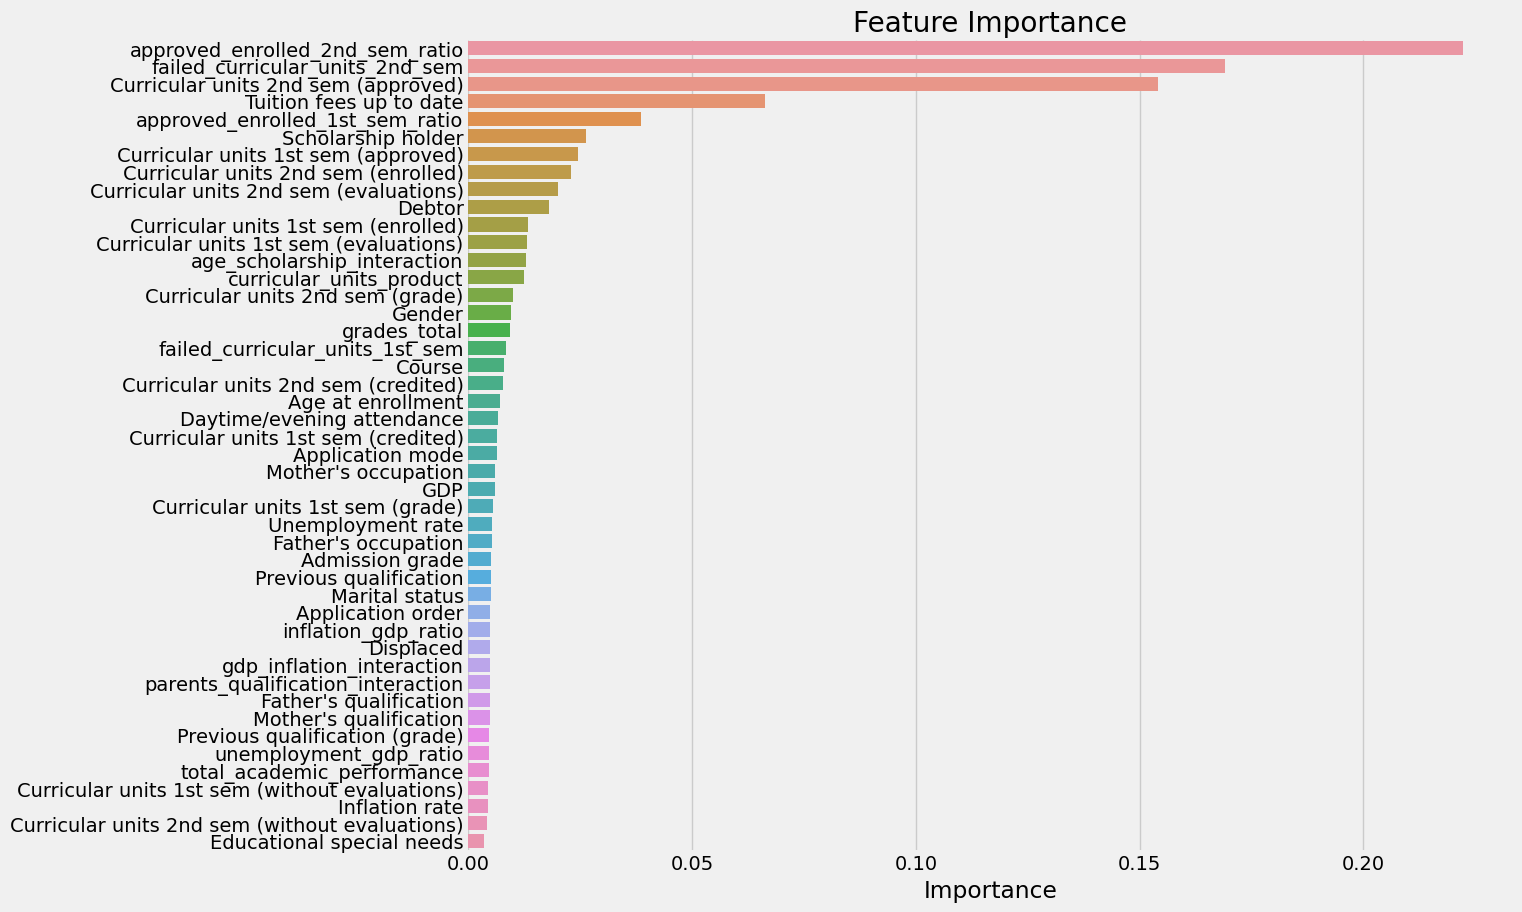

In [37]:
feature_importance = tuned_xgb_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('')
sns.despine(left=True, bottom=True)
plt.show()

In [38]:
tuned_xgb_preds = tuned_xgb_model.predict(df_test)

inverse_mapping = {0: 'Graduate', 1: 'Dropout', 2: 'Enrolled'}

decoded_preds_tuned_xgb = [inverse_mapping[pred] for pred in tuned_xgb_preds]

tuned_xgb_model_output = pd.DataFrame({'id': test_ids, 'Target': decoded_preds_tuned_xgb})
tuned_xgb_model_output.to_csv('submission_tuned_xgboost.csv', index=False)

In [39]:
df = pd.read_csv('submission_tuned_xgboost.csv')
df.head()

,id,Target
0,76518,Dropout
1,76519,Graduate
2,76520,Graduate
3,76521,Graduate
4,76522,Enrolled


In [40]:
base_models = [
    ('gbc', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)),
    ('bc', BaggingClassifier(n_estimators=50, max_samples=0.8, max_features=0.8, random_state=42)),
    ('edt', ExtraTreesClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=42)),
    ('ada', AdaBoostClassifier(n_estimators=50, learning_rate=1.0, algorithm='SAMME.R', random_state=42)),
    ('hgb', HistGradientBoostingClassifier(max_iter=100, learning_rate=0.1, max_leaf_nodes=31, random_state=42)),
    ('lgbm', LGBMClassifier(**{'n_estimators': 250, 'num_class': 3, 'verbosity': -1, 'random_state': 42, 'learning_rate': 0.08, 'num_leaves': 40, 'min_data_in_leaf': 40, 'min_gain_to_split': 1.3739536396889442, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.7})),
    ('xgb', XGBClassifier(**best_params_xgb_current, gpu_id=0, tree_method='gpu_hist', predictor='gpu_predictor', eval_metric='merror', class_weight=class_weights_dict, random_state=42)),
    ('cat', CatBoostClassifier(**{'iterations': 1800, 'learning_rate': 0.048337853529415456, 'depth': 7, 'l2_leaf_reg': 5.240010375977423, 'random_state': 42}, logging_level='Silent'))
]
#meta_model = LogisticRegression()
meta_model = LogisticRegression(random_state=42)
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

In [41]:
stacking_model.fit(x_train, y_train_split)

StackingClassifier(cv=5,
                   estimators=[('gbc',
                                GradientBoostingClassifier(random_state=42)),
                               ('bc',
                                BaggingClassifier(max_features=0.8,
                                                  max_samples=0.8,
                                                  n_estimators=50,
                                                  random_state=42)),
                               ('edt', ExtraTreesClassifier(random_state=42)),
                               ('rf', RandomForestClassifier(random_state=42)),
                               ('ada', AdaBoostClassifier(random_state=42)),
                               ('hgb',
                                HistGradientBoostingClassif...
                                              learning_rate=0.02302515234749565,
                                              max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=6,
                                              max_leaves=None,
                                              min_child_weight=9, missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=4937, n_jobs=None, ...)),
                               ('cat',
                                <catboost.core.CatBoostClassifier object at 0x79d8e11949a0>)],
                   final_estimator=LogisticRegression(random_state=42))

In [42]:
stacking_model_val_preds = stacking_model.predict(x_val)
stacking_model_val_accuracy = accuracy_score(y_val, stacking_model_val_preds)
print(stacking_model_val_accuracy)

0.8384736016727653


In [43]:
stacking_model_preds = stacking_model.predict(df_test)

inverse_mapping = {0: 'Graduate', 1: 'Dropout', 2: 'Enrolled'}

decoded_preds_stacking_model = [inverse_mapping[pred] for pred in stacking_model_preds]

stacking_model_output = pd.DataFrame({'id': test_ids, 'Target': decoded_preds_stacking_model})
stacking_model_output.to_csv('submission.csv', index=False)

In [44]:
df = pd.read_csv('submission.csv')
df.head()

,id,Target
0,76518,Dropout
1,76519,Graduate
2,76520,Graduate
3,76521,Graduate
4,76522,Enrolled


In [45]:
ensemble_models = [
    ('gbc', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)),
    ('bc', BaggingClassifier(n_estimators=50, max_samples=0.8, max_features=0.8, random_state=42)),
    ('edt', ExtraTreesClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=42)),
    ('ada', AdaBoostClassifier(n_estimators=50, learning_rate=1.0, algorithm='SAMME.R', random_state=42)),
    ('hgb', HistGradientBoostingClassifier(max_iter=100, learning_rate=0.1, max_leaf_nodes=31, random_state=42)),
    ('xgb', XGBClassifier(**best_params_xgb_current, gpu_id=0, eval_metric='merror', class_weight=class_weights_dict, random_state=42)),
    ('log', LogisticRegression(penalty='l2', class_weight=class_weights_dict, random_state=42))
]
voting_model = VotingClassifier(estimators=ensemble_models, voting='soft')

In [46]:
voting_model.fit(x_train, y_train_split)

VotingClassifier(estimators=[('gbc',
                              GradientBoostingClassifier(random_state=42)),
                             ('bc',
                              BaggingClassifier(max_features=0.8,
                                                max_samples=0.8,
                                                n_estimators=50,
                                                random_state=42)),
                             ('edt', ExtraTreesClassifier(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('ada', AdaBoostClassifier(random_state=42)),
                             ('hgb',
                              HistGradientBoostingClassifier(ran...
                                            max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=6,
                                            max_leaves=None, min_child_weight=9,
                                            missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=4937, n_jobs=None, ...)),
                             ('log',
                              LogisticRegression(class_weight={0: 0.7029932197784026,
                                                               1: 1.0083017077798861,
                                                               2: 1.7072289156626506},
                                                 random_state=42))],
                 voting='soft')

In [47]:
voting_model_val_preds = voting_model.predict(x_val)
voting_model_val_accuracy = accuracy_score(y_val, voting_model_val_preds)
print(voting_model_val_accuracy)

0.835250043561596


In [48]:
voting_model_preds = voting_model.predict(df_test)

inverse_mapping = {0: 'Graduate', 1: 'Dropout', 2: 'Enrolled'}

decoded_preds_voting_model = [inverse_mapping[pred] for pred in voting_model_preds]

voting_model_output = pd.DataFrame({'id': test_ids, 'Target': decoded_preds_voting_model})
voting_model_output.to_csv('submission_voting_model.csv', index=False)

In [49]:
df = pd.read_csv('submission_voting_model.csv')
df.head()

,id,Target
0,76518,Dropout
1,76519,Graduate
2,76520,Graduate
3,76521,Enrolled
4,76522,Enrolled
